# Importando Bibliotecas e Funções

In [1]:
#importando módulos
import functions
from functions import *

import visualization
from visualization import *


In [2]:
#aumentar display de linhas e colunas
pd.set_option('display.max_columns',350)

pd.set_option('display.min_rows',30)
pd.set_option('display.max_rows',300)

# 2. Estatísticas de Jogador x Jogador

In [3]:
#cria um dataframe com todas as ligas disponiveis
lg = 'https://v3.football.api-sports.io/leagues'
lg = requests.request("GET", lg, headers=headers, data=payload)
lg = lg.json()
lg = json_normalize(lg['response'])
lg = lg[['league.id','league.name','league.type','country.name']]

#conferir league
pais = 'France'
#liga = 'UEFA'

lg[lg.eq(pais).any(1)].reset_index(drop = True)

,league.id,league.name,league.type,country.name
0,61,Ligue 1,League,France
1,62,Ligue 2,League,France
2,63,National 1,League,France
3,66,Coupe de France,Cup,France
4,65,Coupe de la Ligue,Cup,France
5,67,National 2 - Group A,League,France
6,68,National 2 - Group B,League,France
7,69,National 2 - Group C,League,France
8,70,National 2 - Group D,League,France
9,526,Trophée des Champions,Cup,France


In [4]:
#pesquisar

nome1 = 'Messi'

nome2 = 'Mbappe'

league = 61

In [5]:
def play_x_play(nome, league):
    play_name1 = 'https://v3.football.api-sports.io/players?search='+ str(nome) + '&league=' + str(league)
    play_name1 = requests.request("GET", play_name1, headers=headers, data=payload)
    play_name1 = play_name1.json()
    play_name1 = json_normalize(play_name1['response'])
    play_name1 = flatten_nested_json_df(play_name1)
    
    # Cálculo da idade correta
    play_name1['player.birth.date'] = pd.to_datetime(play_name1['player.birth.date'])
    play_name1['player.age.adjusted'] = play_name1['statistics.league.season'] - play_name1['player.birth.date'].dt.year
    
    return play_name1

In [6]:
play_name1 = play_x_play(nome1, league)
play_name2 = play_x_play(nome2, league)

#concatena
playxplay = pd.concat([play_name1,play_name2])

#filtra para a season de 2022 (pode ser 2023)
playxplay = playxplay.query("`statistics.league.season`==2022")

#reseta o index
playxplay = playxplay.reset_index(drop = True)

In [7]:
#transforma as colunas em float

for i in playxplay.iloc[:,23:].columns:
    try:
        playxplay[i] = playxplay[i].astype(float)
    except Exception:
        pass

In [8]:
pp_pergame = playxplay[[col for col in playxplay.columns if 'statistics' in col
           ]].iloc[:, 11:].fillna(0).drop(columns = 'statistics.games.position').div(playxplay['statistics.games.appearences'], axis = 0).round(2)

pp_pergame.columns = [str(col) + '.pergame' for col in pp_pergame.columns]

playxplay = playxplay.join(pp_pergame)

In [9]:
playxplay

,index,player.id,player.name,player.firstname,player.lastname,player.age,player.birth.date,player.birth.place,player.birth.country,player.nationality,player.height,player.weight,player.injured,player.photo,statistics.team.id,statistics.team.name,statistics.team.logo,statistics.league.id,statistics.league.name,statistics.league.country,statistics.league.logo,statistics.league.flag,statistics.league.season,statistics.games.appearences,statistics.games.lineups,statistics.games.minutes,statistics.games.number,statistics.games.position,statistics.games.rating,statistics.games.captain,statistics.substitutes.in,statistics.substitutes.out,statistics.substitutes.bench,statistics.shots.total,statistics.shots.on,statistics.goals.total,statistics.goals.conceded,statistics.goals.assists,statistics.goals.saves,statistics.passes.total,statistics.passes.key,statistics.passes.accuracy,statistics.tackles.total,statistics.tackles.blocks,statistics.tackles.interceptions,statistics.duels.total,statistics.duels.won,statistics.dribbles.attempts,statistics.dribbles.success,statistics.dribbles.past,statistics.fouls.drawn,statistics.fouls.committed,statistics.cards.yellow,statistics.cards.yellowred,statistics.cards.red,statistics.penalty.won,statistics.penalty.commited,statistics.penalty.scored,statistics.penalty.missed,statistics.penalty.saved,player.age.adjusted,statistics.games.minutes.pergame,statistics.games.number.pergame,statistics.games.rating.pergame,statistics.games.captain.pergame,statistics.substitutes.in.pergame,statistics.substitutes.out.pergame,statistics.substitutes.bench.pergame,statistics.shots.total.pergame,statistics.shots.on.pergame,statistics.goals.total.pergame,statistics.goals.conceded.pergame,statistics.goals.assists.pergame,statistics.goals.saves.pergame,statistics.passes.total.pergame,statistics.passes.key.pergame,statistics.passes.accuracy.pergame,statistics.tackles.total.pergame,statistics.tackles.blocks.pergame,statistics.tackles.interceptions.pergame,statistics.duels.total.pergame,statistics.duels.won.pergame,statistics.dribbles.attempts.pergame,statistics.dribbles.success.pergame,statistics.dribbles.past.pergame,statistics.fouls.drawn.pergame,statistics.fouls.committed.pergame,statistics.cards.yellow.pergame,statistics.cards.yellowred.pergame,statistics.cards.red.pergame,statistics.penalty.won.pergame,statistics.penalty.commited.pergame,statistics.penalty.scored.pergame,statistics.penalty.missed.pergame,statistics.penalty.saved.pergame
0,0,154,L. Messi,Lionel Andrés,Messi Cuccittini,36,1987-06-24,Rosario,Argentina,Argentina,170 cm,72 kg,False,https://media-2.api-sports.io/football/players...,85,Paris Saint Germain,https://media-1.api-sports.io/football/teams/8...,61,Ligue 1,France,https://media-3.api-sports.io/football/leagues...,https://media-1.api-sports.io/flags/fr.svg,2022,28.0,28.0,2482.0,NaN,Attacker,8.142857,0.0,0.0,5.0,0.0,83.0,51.0,15.0,0.0,15.0,NaN,1677.0,81.0,49.0,24.0,NaN,1.0,303.0,149.0,154.0,90.0,NaN,34.0,6.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,35.0,88.64,0.0,0.29,0.0,0.00,0.18,0.00,2.96,1.82,0.54,0.0,0.54,0.0,59.89,2.89,1.75,0.86,0.0,0.04,10.82,5.32,5.50,3.21,0.0,1.21,0.21,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0
1,0,278,K. Mbappé,Kylian,Mbappé Lottin,25,1998-12-20,Paris,France,France,178 cm,75 kg,False,https://media-1.api-sports.io/football/players...,85,Paris Saint Germain,https://media-1.api-sports.io/football/teams/8...,61,Ligue 1,France,https://media-3.api-sports.io/football/leagues...,https://media-1.api-sports.io/flags/fr.svg,2022,29.0,27.0,2372.0,NaN,Attacker,7.413793,0.0,2.0,6.0,2.0,94.0,67.0,23.0,0.0,4.0,NaN,1077.0,46.0,30.0,9.0,NaN,4.0,268.0,114.0,160.0,63.0,NaN,35.0,14.0,5.0,0.0,0.0,NaN,NaN,2.0,2.0,NaN,24.0,81.79,0.0,0.26,0.0,0.07,0.21,0.07,3.24,2.31,0.79,0.0,0.14,0.0,37.14,1.59,1.03,0.31,0.0,0.14,9.24,3.93,5.52,2.17,0.0,1.21,0.48,0.17,0.0,0.0,0.0,0.0,0.07,0.07,0.0


<function matplotlib.pyplot.show(close=None, block=None)>

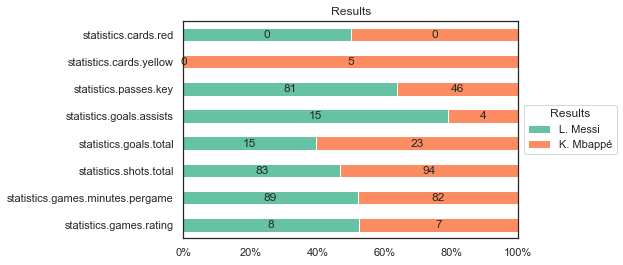

In [10]:
viz_stacked(playxplay)